In [1]:
import sys
from pathlib import Path

# point this to the directory that contains the ReferenceTreeTools folder
PROJECT_ROOT = Path("C:\\Users\\User\\Desktop\\Julian\\Uni\\WS 25\\AIR\\herBERT").resolve()

sys.path.append(str(PROJECT_ROOT))

from ReferenceTreeTools.ReferenceTreeBuilder import ReferenceTreeBuilder



Random root: 2022.semeval-1.79
Visited nodes: 9
Edges in small subgraph: 9
Stored tree: c:\Users\User\Desktop\Julian\Uni\WS 25\AIR\herBERT\output\rtb_tree_2022.semeval-1.79.json

Legend (color = depth):
      (blue) reverse crawl depth       (white) root       (red) crawl depth

Nodes:
  2020.emnlp-demos.6: {}
  N19-1423: {}
  2022.semeval-1.79: {}
  D19-5024: {}
  W19-5034: {}
  2021.semeval-1.149: {}
  2020.acl-main.740: {}
  S17-2001: {}
  D17-1317: {}

Legend (color = weight):
      -1 (blue) undefined       0 (green) non critical       1 (red) critical

Edges:
  N19-1423 -> S17-2001  weight=-1.000
  2022.semeval-1.79 -> N19-1423  weight=-1.000
  2022.semeval-1.79 -> 2021.semeval-1.149  weight=-1.000
  2022.semeval-1.79 -> 2020.acl-main.740  weight=-1.000
  2021.semeval-1.149 -> D19-5024  weight=-1.000
  2021.semeval-1.149 -> N19-1423  weight=-1.000
  2021.semeval-1.149 -> D17-1317  weight=-1.000
  2021.semeval-1.149 -> 2020.emnlp-demos.6  weight=-1.000
  2020.acl-main.740 -> W19-5

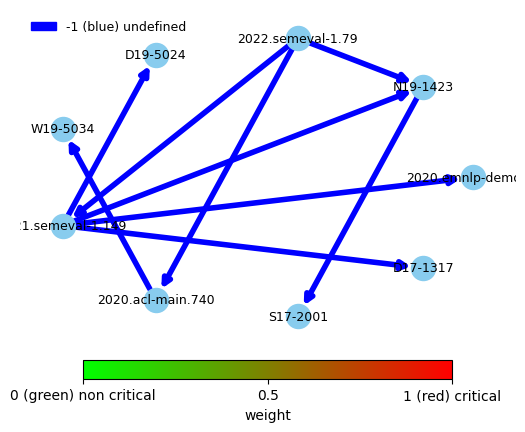

In [7]:
import random
from collections import deque
import os
import sys
import ACLData
from pathlib import Path

MAX_DEPTH = 10
REVERSE_DEPTH = 10

# Pick a random root node that has outgoing citations
edges = ACLData.load_edges_csv("experimental_data/edges.csv")
root = random.choice(ACLData.load_candidate_nodes("experimental_data/acl_candidate_nodes.txt"))
print("Random root:", root)

incoming = ACLData.build_incoming(edges)
outgoing = ACLData.build_outgoing(edges)

for u, vs in outgoing.items():
    for v in vs:
        incoming.setdefault(v, []).append(u)

visited = set([root])
queue = deque([(root, 0)])


while queue:
    pid, depth = queue.popleft()
    if depth >= MAX_DEPTH:
        continue
    for neigh in outgoing.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))


queue = deque([(root, 0)])
while queue:
    pid, depth = queue.popleft()
    if depth >= REVERSE_DEPTH:
        continue
    for neigh in incoming.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))

print("Visited nodes:", len(visited))


# Filter edges 

mini_edges = [(u, v) for (u, v) in edges if u in visited and v in visited]
print("Edges in small subgraph:", len(mini_edges))

# Build reference tree

rtb = ReferenceTreeBuilder()
for pid in visited:
    rtb.addNode(pid)
for u, v in mini_edges:
    rtb.addEdge(u, v)

rtb.build()

out_dir = os.path.join(os.getcwd(), "output")
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, f"rtb_tree_{root}.json")
rtb.store(out_path)

tree = rtb.load(out_path)

print("Stored tree:", out_path)

tree.printTree()
tree.plotTree()
